In [1]:
'''
Aidan Hayes
Data Analysis of UCI Iris Dataset 
Applied Materials Final Interview
3/6/2025
'''

'\nAidan Hayes\nData Analysis of UCI Iris Dataset \nApplied Materials Final Interview\n3/6/2025\n'

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# opening and cleaning data
df = pd.read_csv('iris-data/iris_dataset.csv')

df.rename(columns={'sepal length (cm)': "sepal_length", "sepal width (cm)": "sepal_width", 
                   'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'}, inplace=True)

df_sepal_width = df[["sepal_width", "target"]]

print(df_sepal_width.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_width  150 non-null    float64
 1   target       150 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None


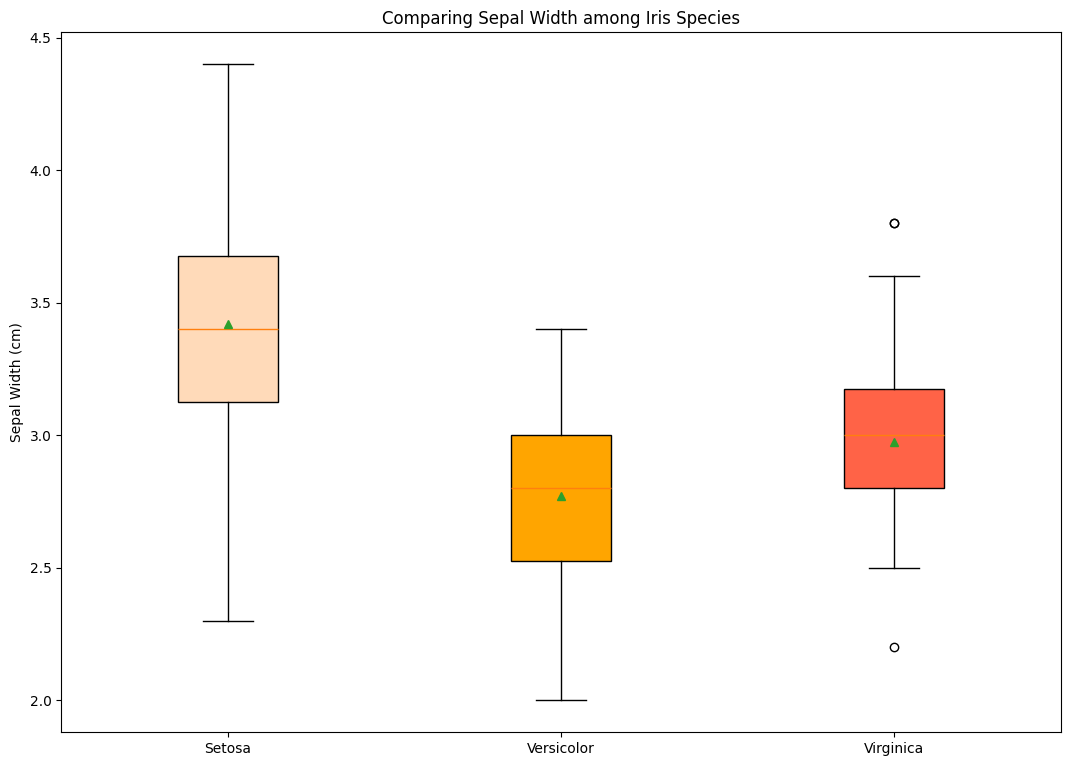

'\nThrough examining our boxplot we can identify that there is a variance among the mean sepal_width among our 3 different features.\nStatistically, we can conduct an ANOVA test to examine whether our means are staticially significant or not. \n'

In [30]:
# exploring data analysis (EDA)

# using box plot to examine why we might need to conduct an ANOVA test 
unique_target_values = df_sepal_width['target'].unique()

setosa_sepal_data = []
versicolor_sepal_data = []
virginica_sepal_data = []

for row, col in df_sepal_width.iterrows():
    if col['target'] == unique_target_values[0]: # setosa
        setosa_sepal_data.append(col['sepal_width'])

    elif col['target'] == unique_target_values[1]: # versicolor
        versicolor_sepal_data.append(col['sepal_width'])

    elif col['target'] == unique_target_values[2]: # virginica'
        virginica_sepal_data.append(col['sepal_width'])


box_plot_data = [setosa_sepal_data, versicolor_sepal_data, virginica_sepal_data]

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
bx = ax.boxplot(box_plot_data, showmeans=True, patch_artist=True)
ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_ylabel('Sepal Width (cm)')

colors = ['peachpuff', 'orange', 'tomato']

for patch, color in zip(bx['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('box-plots-iris', bbox_inches='tight')
plt.title('Comparing Sepal Width among Iris Species')
plt.show()

'''
Through examining our boxplot we can identify that there is a variance in the mean sepal_width among our 3 different species.
Statistically, we can conduct an ANOVA test to examine whether our means are staticially significant or not. 
'''

In [31]:
# Printing out data about count, mean, std_dev, quartiles etc per feature: more EDA
ser1 = pd.Series(data=setosa_sepal_data)
ser2 = pd.Series(data=versicolor_sepal_data)
ser3 = pd.Series(data=virginica_sepal_data)

print(f'Setosa data:\n{ser1.describe()}\n')
print(f'Versicolor data:\n{ser2.describe()}\n')
print(f'Virginica data:\n{ser3.describe()}\n')

Setosa data:
count    50.000000
mean      3.418000
std       0.381024
min       2.300000
25%       3.125000
50%       3.400000
75%       3.675000
max       4.400000
dtype: float64

Versicolor data:
count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2.525000
50%       2.800000
75%       3.000000
max       3.400000
dtype: float64

Virginica data:
count    50.000000
mean      2.974000
std       0.322497
min       2.200000
25%       2.800000
50%       3.000000
75%       3.175000
max       3.800000
dtype: float64



In [32]:
'''
Conducting an ANOVA test on our data 

Ho: The population means of sepal width for Setosa, Versicolor, and Virginica are equal.
Ha: At least one of the species has a mean sepal width different from the others.

# We use one-way ANOVA test because we are working with one independent variable(sepal_width)
'''

results = f_oneway(setosa_sepal_data, versicolor_sepal_data, virginica_sepal_data)
print(f'The f-stat is {results.statistic} and the p-val is {results.pvalue}')

'''
The p-value of the one-way analysis is 1.32e-16, below the 0.05 threshold.
Allowing us to reject the Null hypothesis and conclude the alternate, that the mean sepal_width is not the same for the three features.
'''

The f-stat is 47.36446140299382 and the p-val is 1.3279165184572242e-16


'\nThe p-value of the one-way analysis is 1.32e-16, below the 0.05 threshold.\nAllowing us to reject the Null hypothesis and conclude the alternate, that the mean sepal_width is not the same for the three features.\n'

In [33]:
'''
Conducting a Tukey-HSD

Now we have figured out there is a difference in sepal_width but it begs the question: which population differences are significant?
Is it just Setosa and Versicolor, or Versicolor and Virginica, or all of them?
We want to identify which pairs of populations are likely significantly different from each other.
Since we have samples of equal size, we will use Tukey Honesty Significant Difference (HSD).

We will call setosa T1, Versicolor, T2 and Virginica T3.

1 Ho: mean(t1) = mean(t2), Ha: mean(t1) != mean(t2)
2 Ho: mean(t3) = mean(t3), Ha: mean(t2) != mean(t3)
3 Ho: mean(t1) = mean(t3), Ha: mean(t1) != mean(t3)
'''

# asserting equal sample size 
assert len(setosa_sepal_data) == len(versicolor_sepal_data) == len(virginica_sepal_data)

# Stats models needs one single dataset, so 
model_result = pairwise_tukeyhsd(endog=df_sepal_width['sepal_width'], groups=df_sepal_width['target'], alpha=0.05)

print(model_result.summary())
'''
As we can see, it was found that all combinations were found to be different from each other through p-values.
We reject all of our null hypothesis and conclude that T1, T2 and T3 all produce significantly different means
'''

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
    Iris-setosa Iris-versicolor   -0.648   0.0 -0.8092 -0.4868   True
    Iris-setosa  Iris-virginica   -0.444   0.0 -0.6052 -0.2828   True
Iris-versicolor  Iris-virginica    0.204 0.009  0.0428  0.3652   True
---------------------------------------------------------------------


'\nAs we can see, it was found that all combinations were found to be different from each other through p-values.\nWe reject all of our null hypothesis and conclude that T1, T2 and T3 all produce significantly different means\n'